<center> 
    <h1> Toronto Crime </h1>
<h3> Sprint 3</h3>
<h3> Fixied Modelling</h3>
    </center>

##### Author: Arsalan Arif Radhu
##### Date: 21 November 2023

### Table of Contents:
- [Introduction](#intro) <br />
- [Basic Modelling](#bmodel)<br />
- [Basic Feature Engineering](#bfengin)<br />

### Introduction <a id="intro" /> 

After realizing my mistakes I will be doing the changes I refererred to in `MoreModelling` notebook.

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt

In [18]:
# Importing the data
df = pd.read_csv('../Data/FixedFinalDataAdvAn.csv', index_col=0)
df.reset_index(inplace=True)

In [19]:
df.head(10)

,index,OBJECTID,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,LONG_WGS84,...,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
0,0,1,0,2014,1,1,1998,6,1,-79.425896,...,0,0,1,0,0,0,0,0,0,0
1,1,2,0,2014,1,1,2014,1,1,-79.376497,...,0,0,1,0,0,0,0,0,0,0
2,2,3,0,2014,1,1,2014,1,1,-79.344839,...,1,0,0,0,0,0,0,0,1,0
3,3,4,0,2014,1,1,2014,1,1,-79.391841,...,0,0,0,1,0,0,0,0,0,0
4,4,5,0,2014,1,1,2014,1,1,-85.488744,...,0,1,0,0,0,0,0,0,1,0
5,5,6,0,2014,1,1,2014,1,1,-79.416594,...,0,0,0,1,0,0,0,0,0,0
6,6,7,0,2014,1,1,2014,1,1,-79.391279,...,0,0,0,1,0,0,0,0,0,0
7,7,8,0,2014,1,1,2014,1,1,-79.345795,...,0,0,0,1,0,0,0,0,0,0
8,8,9,0,2014,1,1,2014,1,1,-79.132919,...,0,0,0,0,0,0,0,0,0,1
9,9,10,0,2014,1,1,2014,1,1,-79.455586,...,0,0,1,0,0,0,0,0,0,0


As discussed in the previous notebook, I will be dropping all the indices.

In [20]:
df.drop('index', axis=1, inplace= True)
df.drop('OBJECTID', axis=1, inplace= True)

In [21]:
shuffled_df = df.sample(frac=1)

In [22]:
shuffled_df.head(10)

,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,LONG_WGS84,LAT_WGS84,DEATH,...,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
205993,5,2015,10,27,2015,10,14,-79.382692,43.711208,0,...,0,0,0,0,0,1,0,0,0,0
268749,5,2018,6,13,2018,6,13,-79.418034,43.755535,0,...,0,0,0,1,0,0,0,0,0,0
297281,5,2021,5,28,2021,5,18,-79.412312,43.780470,0,...,0,0,0,0,0,0,0,0,1,0
97699,0,2019,8,30,2019,8,30,-79.404001,43.731969,0,...,0,0,0,0,0,0,0,0,1,0
352023,1,2014,1,7,2014,1,7,-79.389898,43.677847,0,...,0,0,0,1,0,0,0,0,0,0
4678,0,2014,5,5,2014,5,5,-79.363523,43.710354,0,...,0,0,0,1,0,0,0,0,0,0
243434,5,2015,5,14,2015,5,8,-79.577961,43.736822,0,...,0,0,0,0,0,1,0,0,0,0
195327,5,2022,6,12,2022,6,11,-79.157727,43.801254,0,...,0,0,0,0,0,0,0,0,1,0
272256,5,2018,10,15,2018,10,12,-79.536260,43.753284,0,...,0,0,0,0,0,0,0,0,1,0
408711,1,2022,1,31,2022,1,31,-79.188816,43.768501,0,...,0,0,0,1,0,0,0,0,0,0


## KNN <a id="knn" /> 

In [28]:
# Extract features and labels
X = df.drop('CRIME_TYPE', axis=1)  # Replace 'label_column' with the actual label column name
y = df['CRIME_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) 

train_acc = []
test_acc = []

# KNN model

k_range = range(1,40,2)

for k in k_range:
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors (k) as needed

    # Train the model
    knn_classifier.fit(X_train, y_train)
    
    
    # Scores
    
    train_acc.append(knn_classifier.score(X_train, y_train))
    test_acc.append(knn_classifier.score(X_test, y_test)) 
 

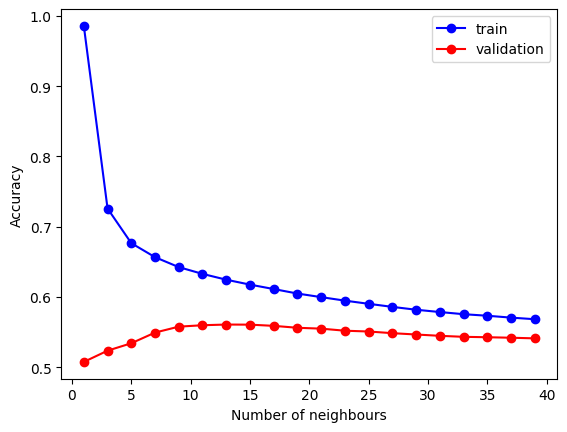

In [38]:
# Visulization
plt.figure()
plt.plot(k_range, train_acc, c = 'blue', label = 'train', marker = 'o')
plt.plot(k_range, test_acc, c = 'red', label = 'validation', marker = 'o')


plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) 


# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=11)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [40]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5597711968720585
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60     31647
           1       0.40      0.21      0.28     12347
           2       0.19      0.02      0.03       234
           3       0.26      0.04      0.08      5246
           4       0.83      0.44      0.57      1204
           5       0.62      0.66      0.64     32188

    accuracy                           0.56     82866
   macro avg       0.47      0.34      0.37     82866
weighted avg       0.54      0.56      0.53     82866



In [24]:
# Get feature importances
feature_importances = knn_classifier.feature_importances_

# Pair feature names with their importance s}cores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Print or plot feature importances
print(feature_importance_dict)

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

Creating a visual for easy readability.

In [ ]:
importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## XGBoost <a id="xgb" /> 

In [25]:
# Extract features and labels
X_boost = df.drop('CRIME_TYPE', axis=1)  # Replace 'label_column' with the actual label column name
y_boost = df['CRIME_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_boost, y_boost, test_size=0.3, random_state=50)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6297315344451685
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.73      0.67     47661
           1       0.50      0.29      0.37     18931
           2       0.50      0.31      0.38       397
           3       0.51      0.03      0.05      7818
           4       0.85      0.93      0.89      1735
           5       0.67      0.75      0.71     47757

    accuracy                           0.63    124299
   macro avg       0.61      0.51      0.51    124299
weighted avg       0.61      0.63      0.60    124299



In [26]:
# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Pair feature names with their importance s}cores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Print or plot feature importances
print(feature_importance_dict)

{'REPORT_YEAR': 0.0050854157, 'REPORT_MONTH': 0.0038374981, 'REPORT_DAY': 0.016495366, 'OCC_YEAR': 0.006632384, 'OCC_MONTH': 0.0050792904, 'OCC_DAY': 0.01957252, 'LONG_WGS84': 0.006648004, 'LAT_WGS84': 0.0058807284, 'DEATH': 0.0103854295, 'INJURIES': 0.02955502, 'D11': 0.0053145476, 'D12': 0.0031652546, 'D13': 0.0028766408, 'D14': 0.003158494, 'D22': 0.01183429, 'D23': 0.008906449, 'D31': 0.0076689804, 'D32': 0.008107453, 'D33': 0.0064899107, 'D41': 0.0038273816, 'D42': 0.0033103714, 'D43': 0.0031678495, 'D51': 0.0065334085, 'D52': 0.010952516, 'D53': 0.010483871, 'D55': 0.003810799, 'NSA': 0.01079172, 'Apartment': 0.09409077, 'Commercial': 0.024319531, 'Educational': 0.019440755, 'House': 0.081104316, 'NotApplicable': 0.20503007, 'Other': 0.030859375, 'Outside': 0.2510154, 'Transit': 0.074568205}


Creating a visual for easy readability.

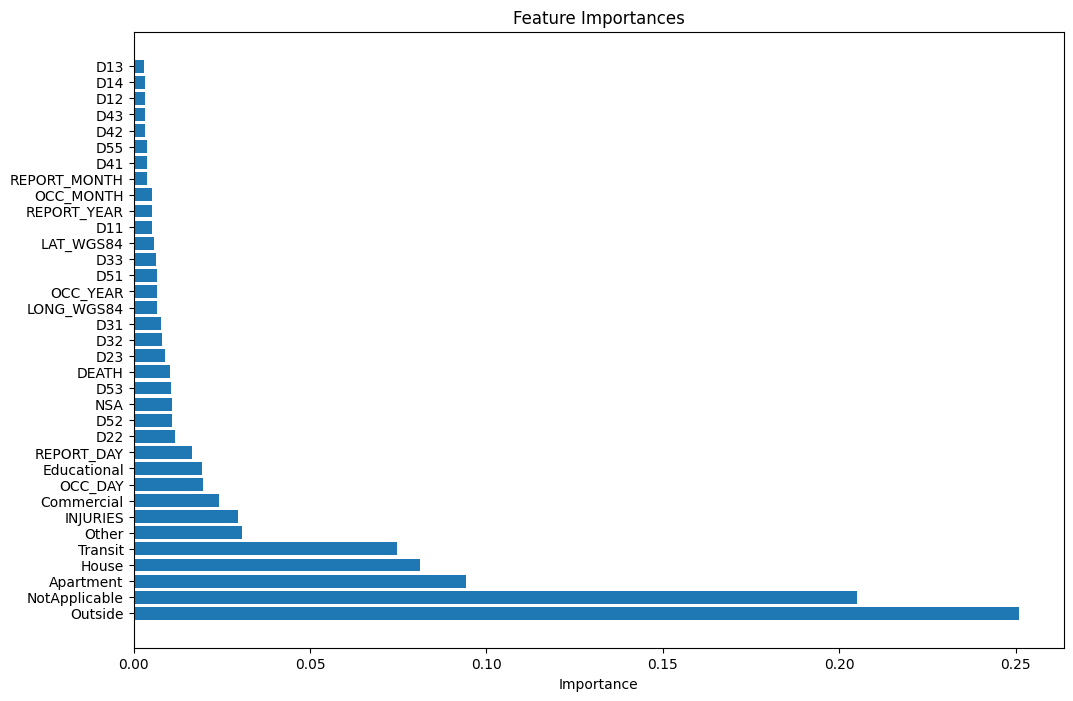

In [27]:
importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()